# Human Resources: Employee Retention

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

sns.set(style="whitegrid", color_codes=True)
sns.set_context("paper", font_scale=1.8)

In [4]:
hr_df = pd.read_csv("data/HR.csv")
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [95]:
hr_df.shape

(14999, 6)

## EDA

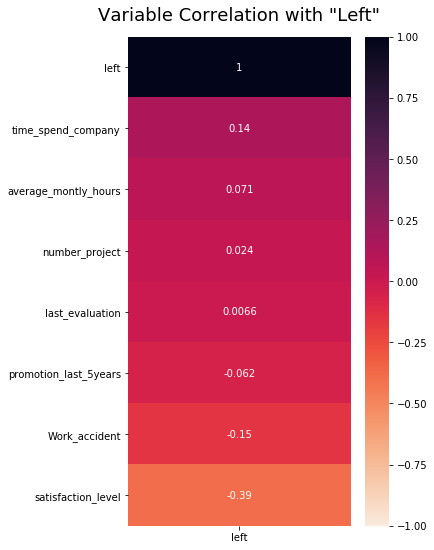

In [15]:
plt.figure(figsize=(5, 9))
heatmap = sns.heatmap(hr_df.corr()[['left']].sort_values(by='left', ascending=False), vmin=-1, vmax=1, annot=True, cmap='rocket_r')
heatmap.set_title('Variable Correlation with "Left"', fontdict={'fontsize':18}, pad=16);

Looking at the Correlation Heatmap it looks as if the top 5 factors for employee retention are:

1) Employee Satisfaction Level

2) Whether or Not the Employee was in a Work Accident

3) Time Employee has Spent with the Company

4) Employees Average Monthly Hours

5) Whether or Not the Employee was Promotted in the Last 5 Years


_______________________________________________________________________________________
I suspect not many employees have had a work accident so I am looking into this further


In [91]:
hr_df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

16.9% of employees have has work accidnets, this may be high enough to leave in for my analysis. I will try it with and without.
______________________________________

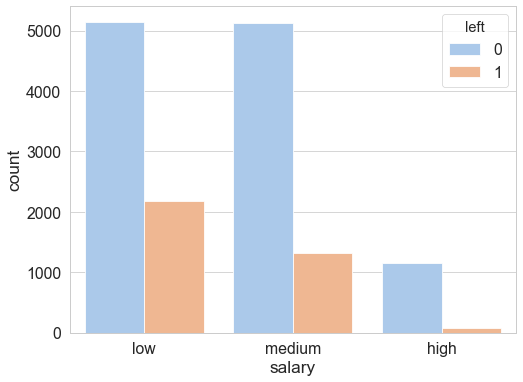

In [56]:
fig, bar_salary = plt.subplots(figsize = (8,6))
bar_salary = sns.countplot(x ='salary', hue = "left", data = hr_df, palette = ("pastel"))

In [74]:
#low salary
hr_df[hr_df['salary'] == 'low'].groupby(["left"])[['salary']].count()

,salary
left,
0,5144
1,2172


In [75]:
#medium salary
hr_df[hr_df['salary'] == 'medium'].groupby(["left"])[['salary']].count()

,salary
left,
0,5129
1,1317


In [76]:
#high salary
hr_df[hr_df['salary'] == 'high'].groupby(["left"])[['salary']].count()

,salary
left,
0,1155
1,82


Percent with low salary that left: 42.2%

Percent with medium salary that left: 25.7%

Percent with high salary that left: 7.1%


Salary has a high impact on whether or not an employee will leave the following year.

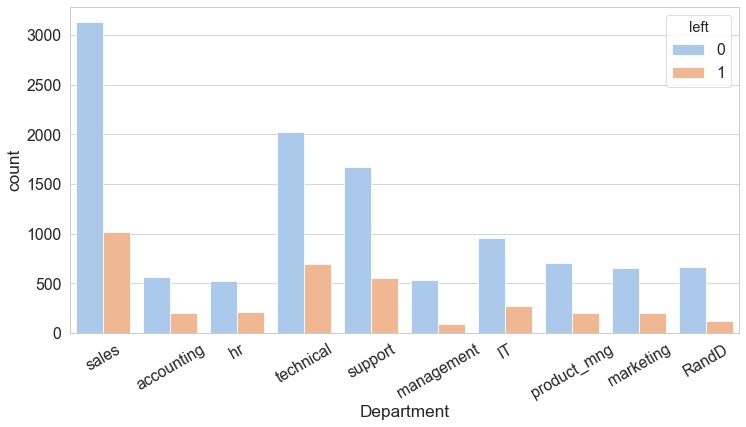

In [82]:
fig, bar_dep = plt.subplots(figsize = (12,6))
bar_dep = sns.countplot(x ='Department', hue = "left", data = hr_df, palette = ("pastel"))

for item in bar_dep.get_xticklabels():
    item.set_rotation(30)

In [83]:
# Checking a few Departments

# Sales Department
hr_df[hr_df['Department'] == 'sales'].groupby(["left"])[['Department']].count()

,Department
left,
0,3126
1,1014


In [84]:
# HR Department
hr_df[hr_df['Department'] == 'hr'].groupby(["left"])[['Department']].count()

,Department
left,
0,524
1,215


In [85]:
# Technical Department
hr_df[hr_df['Department'] == 'technical'].groupby(["left"])[['Department']].count()

,Department
left,
0,2023
1,697


In [86]:
# Support Department
hr_df[hr_df['Department'] == 'support'].groupby(["left"])[['Department']].count()

,Department
left,
0,1674
1,555


Percent in Sales that left: 32.4%

Percent in HR that left: 41%

Percent in Technical that left: 34.5%

Percent in Support that left: 33.2%

These percents are much closer to each other, so I am not going to use department in my analysis.

# Cleaning Data

I am choosing to remove the columns "number_project", "last_evaluation", and "department", because they do not have a strong correlation with whether or not the employee left the company the following year.

In [96]:
hr_df = hr_df[['satisfaction_level','Work_accident','average_montly_hours','promotion_last_5years','time_spend_company','salary']]
hr_df.head()

,satisfaction_level,Work_accident,average_montly_hours,promotion_last_5years,time_spend_company,salary
0,0.38,0,157,0,3,low
1,0.80,0,262,0,6,medium
2,0.11,0,272,0,4,medium
3,0.72,0,223,0,5,low
4,0.37,0,159,0,3,low


## Cleaning Categorical Variables

Created dummy variables for the salary column

In [97]:
salary_dummies = pd.get_dummies(hr_df.salary, prefix="salary")

In [ ]:
hr_df_for_sklearn = pd.concat([subdf,salary_dummies],axis='columns')

## Logistic Regression

## Random Forest

## Conclusion